<a href="https://colab.research.google.com/github/ziriael-absten/Sales-analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Встановлення та імпорт
!pip install --upgrade google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

In [ ]:
# Авторизація
auth.authenticate_user()

# Створення клієнта для роботи з BigQuery
client = bigquery.Client(project="data-analytics-mate")


In [ ]:
# SQL запит
query = """
SELECT
  s.date,
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp.medium,
  sp.channel,
  acs.account_id,
  acc.is_verified,
  acc.is_unsubscribed,
  p.category,
  p.name,
  p.price,
  p.short_description
FROM
  `DA.session` s
JOIN
  `DA.session_params` sp
ON
  s.ga_session_id = sp.ga_session_id
LEFT JOIN
  `DA.account_session` acs
ON
  s.ga_session_id = acs.ga_session_id
LEFT JOIN
  `DA.account` acc
ON
  acs.account_id = acc.id
LEFT JOIN
  `DA.order` o
ON
  s.ga_session_id = o.ga_session_id
LEFT JOIN
  `DA.product` p
ON
  o.item_id = p.item_id """

In [ ]:
# Перетворення результатів у pandas DataFrame
df = client.query(query).to_dataframe()

# Конвертування колонки order_date у тип datetime
df["date"] = pd.to_datetime(df["date"])

# Виведення перших 5 рядків
print(df.head())

        date  ga_session_id  continent    country   device browser  \
0 2021-01-19     7268004754  (not set)  (not set)  desktop  Chrome   
1 2021-01-06     8321293308  (not set)  (not set)  desktop  Chrome   
2 2020-11-05     4392362373  (not set)  (not set)  desktop  Chrome   
3 2020-12-09      140108698  (not set)  (not set)  desktop  Chrome   
4 2020-11-10     8351127264  (not set)  (not set)   mobile  Safari   

  mobile_model_name operating_system language   medium         channel  \
0            Chrome              Web    en-gb   (none)          Direct   
1            Chrome              Web     None   (none)          Direct   
2            Chrome              Web     None  organic  Organic Search   
3            Safari              Web    en-us   (none)          Direct   
4            iPhone              Web    en-us  organic  Organic Search   

   account_id  is_verified  is_unsubscribed category  name  price  \
0        <NA>         <NA>             <NA>     None  None    NaN

In [ ]:
# Короткий опис датасету
print(f"Кількість колонок: {len(df.columns)}")
print("Назви колонок:", df.columns.tolist())
print()
numeric_cols = df.select_dtypes(include=["number"]).columns
print(f"Кількість числових колонок: {len(numeric_cols)}")
print("Числові колонки:", numeric_cols.tolist())
print()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
print(f"Кількість категоріальних колонок: {len(categorical_cols)}")
print("Категоріальні колонки:", categorical_cols.tolist())
print()
datetime_cols = df.select_dtypes(include=["datetime"]).columns
print(f"Кількість колонок типу datetime: {len(datetime_cols)}")
print("Datetime-колонки:", datetime_cols.tolist())
print()
print(f"Кількість унікальних сесій: {df['ga_session_id'].nunique()}")
print()
print("Період часу розглядається від", df["date"].min(), "до", df["date"].max())
print()
missing = df.isnull().sum()
print("Чи є пропущені значення?", missing.any())
missing_sorted = missing[missing > 0].sort_values(ascending=False)
print()
print("Колонки з пропущеними значеннями:")
print(missing_sorted)

Кількість колонок: 18
Назви колонок: ['date', 'ga_session_id', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'account_id', 'is_verified', 'is_unsubscribed', 'category', 'name', 'price', 'short_description']

Кількість числових колонок: 5
Числові колонки: ['ga_session_id', 'account_id', 'is_verified', 'is_unsubscribed', 'price']

Кількість категоріальних колонок: 12
Категоріальні колонки: ['continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'category', 'name', 'short_description']

Кількість колонок типу datetime: 1
Datetime-колонки: ['date']

Кількість унікальних сесій: 349545

Період часу розглядається від 2020-11-01 00:00:00 до 2021-01-31 00:00:00

Чи є пропущені значення? True

Колонки з пропущеними значеннями:
account_id           321600
is_verified          321600
is_unsubscribed      321600
category             316007
price                316

In [ ]:
# Континенти-лідери за продажами
top_continents_sales = df.groupby("continent")["price"].sum().sort_values(ascending=False).head(3)
print("Топ-3 континенти за обсягом продажів:")
print(top_continents_sales)
print()
# Континенти-лідери за кількістю замовлень
top_continents_orders = df.groupby("continent")["ga_session_id"].nunique().sort_values(ascending=False).head(3)
print("Топ-3 континенти за кількістю замовлень:")
print(top_continents_orders)
print()
# Країни-лідери за продажами
top_countries_sales = df.groupby("country")["ga_session_id"].sum().sort_values(ascending=False).head(5)
print("Топ-5 країн за обсягом продажів:")
print(top_countries_sales)
print()
# Країни-лідери за кількістю замовлень
top_countries_orders = df.groupby("country")["ga_session_id"].nunique().sort_values(ascending=False).head(5)
print("Топ-5 країн за кількістю замовлень:")
print(top_countries_orders)


Топ-3 континенти за обсягом продажів:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Топ-3 континенти за кількістю замовлень:
continent
Americas    193179
Asia         83113
Europe       65135
Name: ga_session_id, dtype: int64

Топ-5 країн за обсягом продажів:
country
United States     766833732850393
India             164304870133108
Canada            130332148964433
United Kingdom     54882431325885
France             34893957783097
Name: ga_session_id, dtype: Int64

Топ-5 країн за кількістю замовлень:
country
United States     153470
India              32763
Canada             25994
United Kingdom     11003
France              6958
Name: ga_session_id, dtype: int64


In [ ]:
top_categories = df.groupby("category")["price"].sum().sort_values(ascending=False).head(10)
print("Топ-10 категорій за загальною сумою продажів:")
print(top_categories)
print()
top_country = df.groupby("country")["price"].sum().idxmax()
print(f"Країна з найбільшими продажами: {top_country}")
print()
df_top_country = df[df["country"] == top_country]
top_categories_in_top_country = df_top_country.groupby("category")["price"].sum().sort_values(ascending=False).head(10)
print()
print(f"Топ-10 категорій у країні {top_country}:")
print(top_categories_in_top_country)


Топ-10 категорій за загальною сумою продажів:
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64

Країна з найбільшими продажами: United States


Топ-10 категорій у країні United States:
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units    

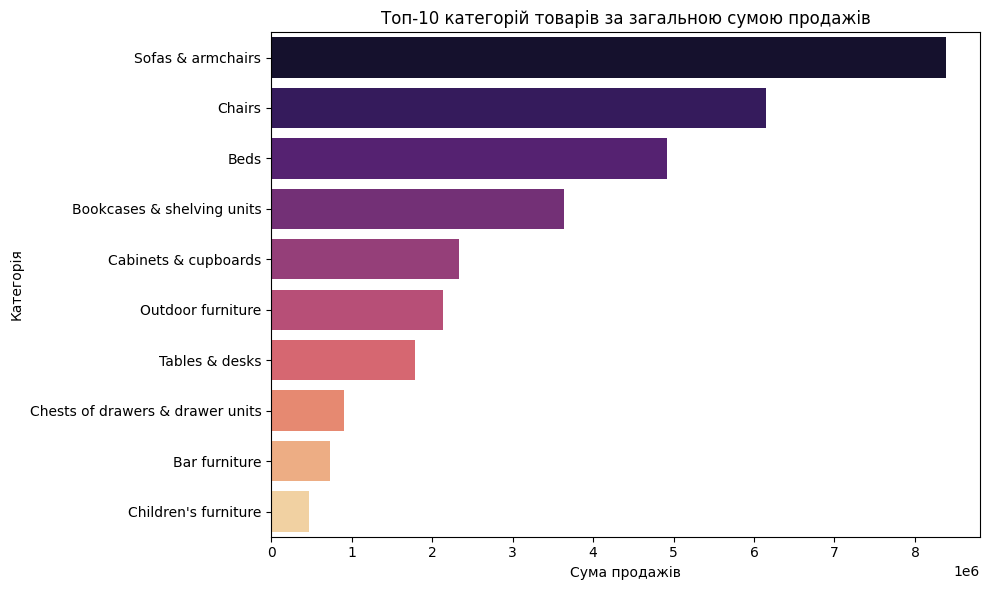

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Топ-10 категорій загалом
top_categories = df.groupby("category")["price"].sum().sort_values(ascending=False).head(10)

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    palette="magma",
    dodge=False,
    legend=False
)
plt.title("Топ-10 категорій товарів за загальною сумою продажів")
plt.xlabel("Сума продажів")
plt.ylabel("Категорія")
plt.tight_layout()
plt.show()


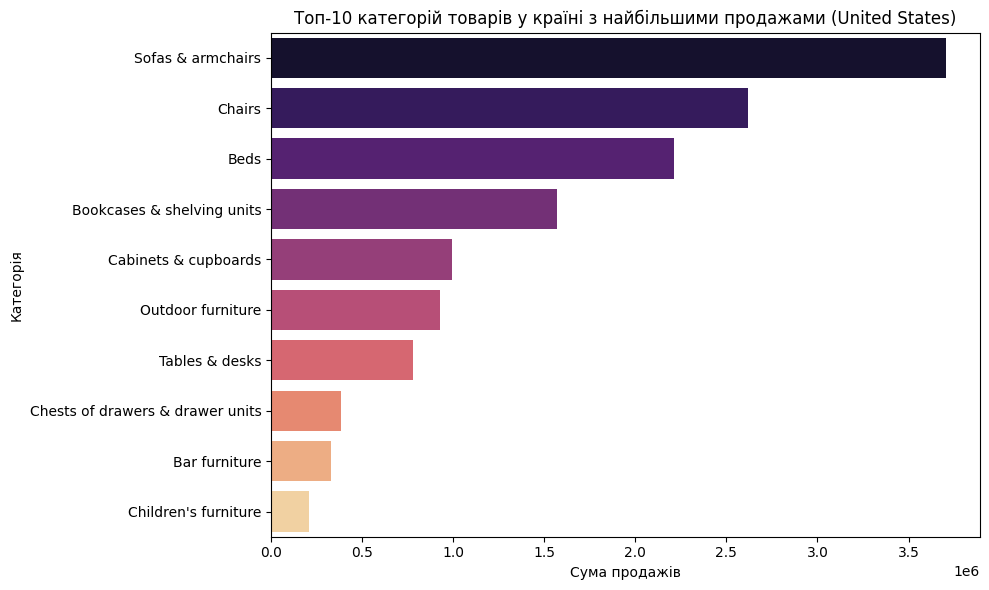

In [ ]:
# Знаходимо країну з найбільшими продажами
top_country = df.groupby("country")["price"].sum().idxmax()

# Фільтруємо дані по цій країні
df_top_country = df[df["country"] == top_country]

# Топ-10 категорій у цій країні
top_categories_in_top_country = df_top_country.groupby("category")["price"].sum().sort_values(ascending=False).head(10)

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_categories_in_top_country.values,
    y=top_categories_in_top_country.index,
    hue=top_categories_in_top_country.index,
    palette="magma",
    dodge=False,
    legend=False
)
plt.title(f"Топ-10 категорій товарів у країні з найбільшими продажами ({top_country})")
plt.xlabel("Сума продажів")
plt.ylabel("Категорія")
plt.tight_layout()
plt.show()


Наглядно можемо помітити, що категорії лідери за продажами по всім країнам, та категорії лідери в країні з найбільшим доходом не відрізняються.

In [ ]:
# Загальна сума продажів
total_price = df["price"].sum()

# Продажі за типом девайса
device_type_percent = (
    df.groupby("device")["price"]
    .sum()
    .apply(lambda x: round(x / total_price * 100, 2))
    .sort_values(ascending=False)
)

# Продажі за моделлю девайса
device_model_percent = (
    df.groupby("mobile_model_name")["price"]
    .sum()
    .apply(lambda x: round(x / total_price * 100, 2))
    .sort_values(ascending=False)
)

print("% продажів за типами девайсів:")
print(device_type_percent)
print()
print("% продажів за моделями девайсів:")
print(device_model_percent)


% продажів за типами девайсів:
device
desktop    59.00
mobile     38.73
tablet      2.26
Name: price, dtype: float64

% продажів за моделями девайсів:
mobile_model_name
Chrome        27.84
<Other>       20.44
Safari        20.30
iPhone        20.08
ChromeBook     5.73
Edge           2.18
iPad           1.40
Firefox        1.32
Pixel 4 XL     0.37
Pixel 3        0.34
Name: price, dtype: float64


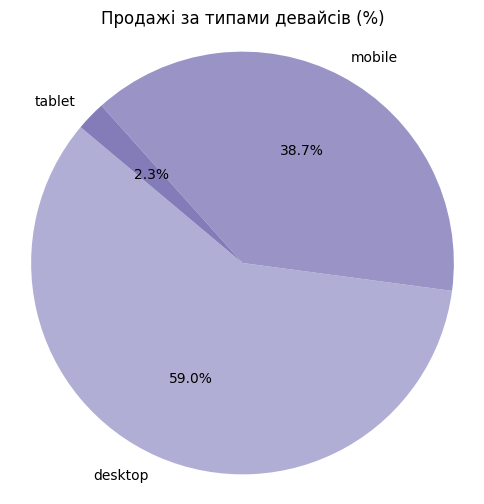

In [ ]:
# Візуалізація % продажів за типами девайсів
plt.figure(figsize=(6, 6))
plt.pie(
    device_type_percent.values,
    labels=device_type_percent.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Purples_d")
)
plt.title("Продажі за типами девайсів (%)")
plt.axis("equal")
plt.show()


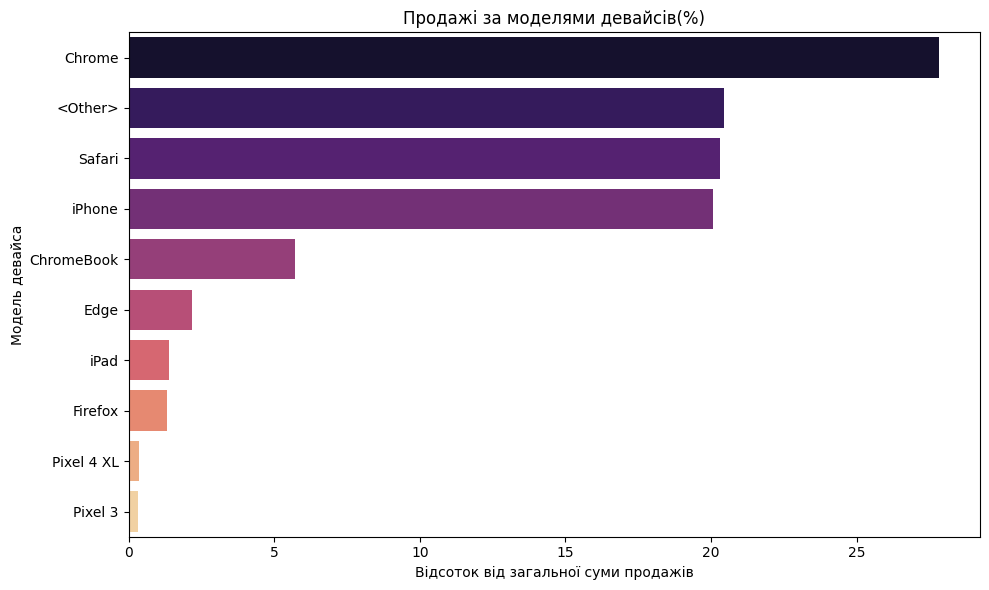

In [ ]:

device_model_percent

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(
    x=device_model_percent.values,
    y=device_model_percent.index,
    hue=device_model_percent.index,
    palette="magma",
    dodge=False,
    legend=False
)
plt.title("Продажі за моделями девайсів(%)")
plt.xlabel("Відсоток від загальної суми продажів")
plt.ylabel("Модель девайса")
plt.tight_layout()
plt.show()


In [ ]:
# Продажі за джерелами трафіку
traffic_source_percent = (
    df.groupby("channel")["price"]
    .sum()
    .apply(lambda x: round(x / total_price * 100, 2))
    .sort_values(ascending=False)
)

print("% продажів за джерелами трафіку:")
print(traffic_source_percent)


% продажів за джерелами трафіку:
channel
Organic Search    35.76
Paid Search       26.62
Direct            23.44
Social Search      7.92
Undefined          6.26
Name: price, dtype: float64


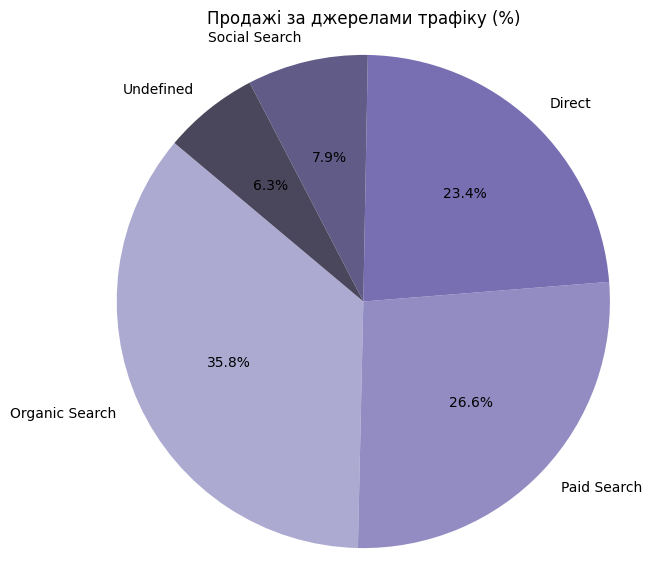

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(
    traffic_source_percent.values,
    labels=traffic_source_percent.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Purples_d", n_colors=len(traffic_source_percent))
)
plt.title("Продажі за джерелами трафіку (%)")
plt.axis("equal")
plt.show()


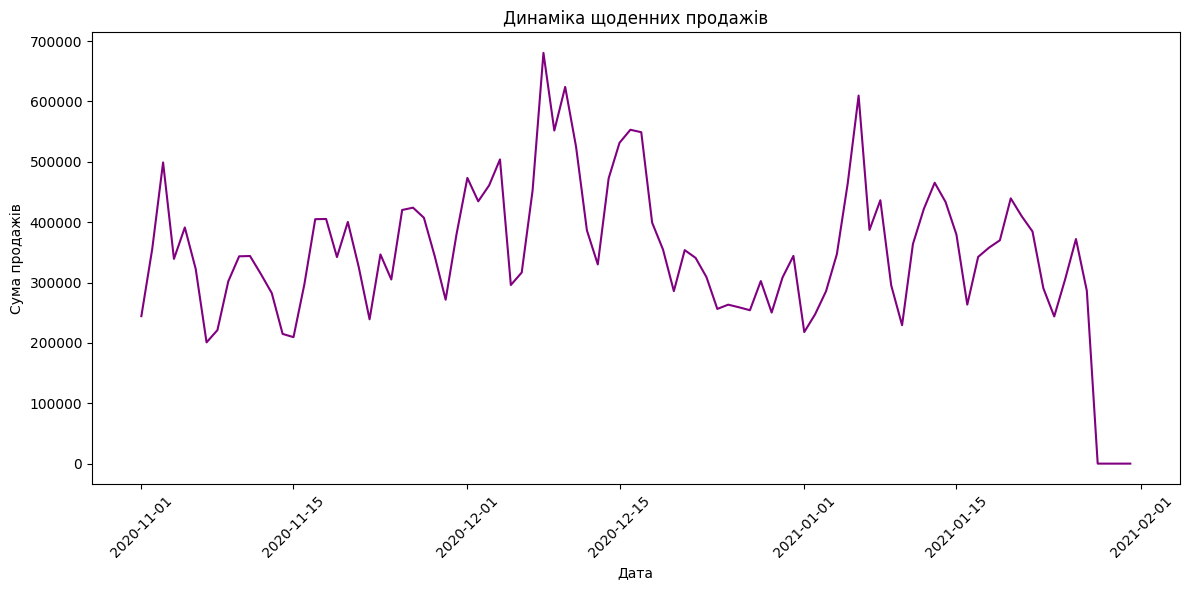

In [ ]:
# Загальна динаміка продажів
daily_sales = df.groupby("date")["price"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x="date", y="price", color="purple")
plt.title("Динаміка щоденних продажів")
plt.xlabel("Дата")
plt.ylabel("Сума продажів")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


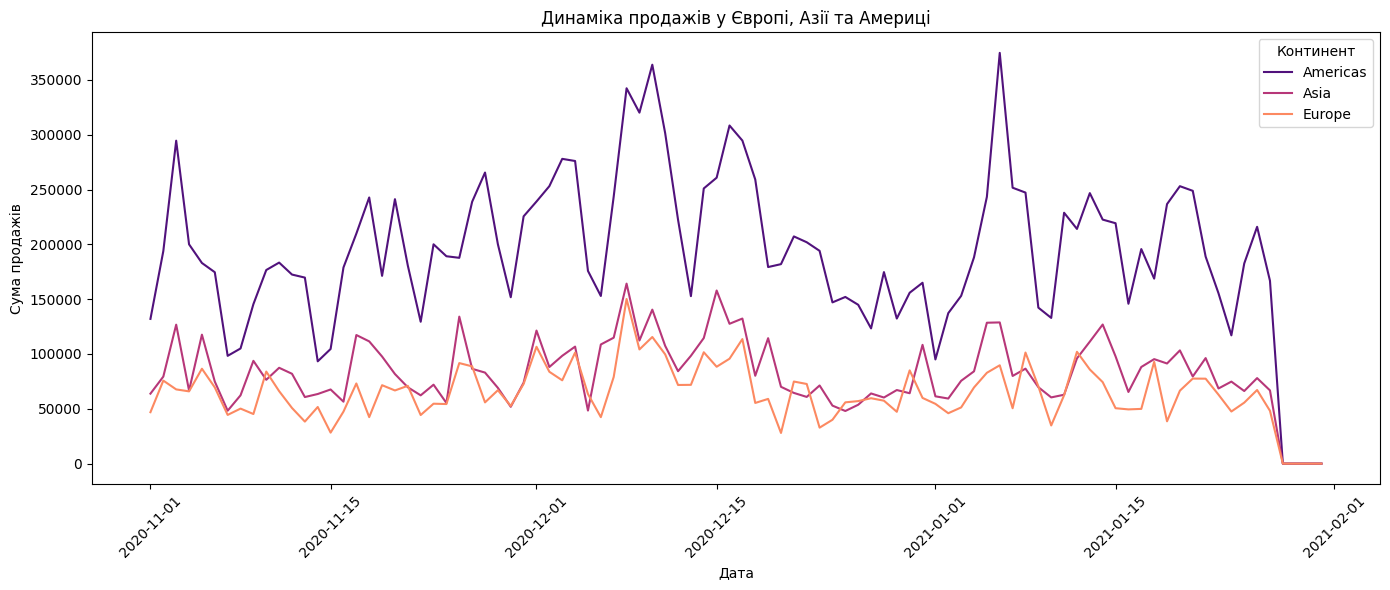

In [ ]:
# Динаміка продажів за континентами
continents = ["Europe", "Asia", "Americas"]
df_filtered = df[df["continent"].isin(continents)]
sales_by_continent = (
    df_filtered.groupby(["date", "continent"])["price"]
    .sum()
    .reset_index()
)
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=sales_by_continent,
    x="date",
    y="price",
    hue="continent",
    palette="magma"
)

plt.title("Динаміка продажів у Європі, Азії та Америці")
plt.xlabel("Дата")
plt.ylabel("Сума продажів")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Континент")
plt.show()


Найвищі результати продажів демонструє континент Америка, але з більш нестабільним розподілом значень, ніж на кантинентах Європа та Азія

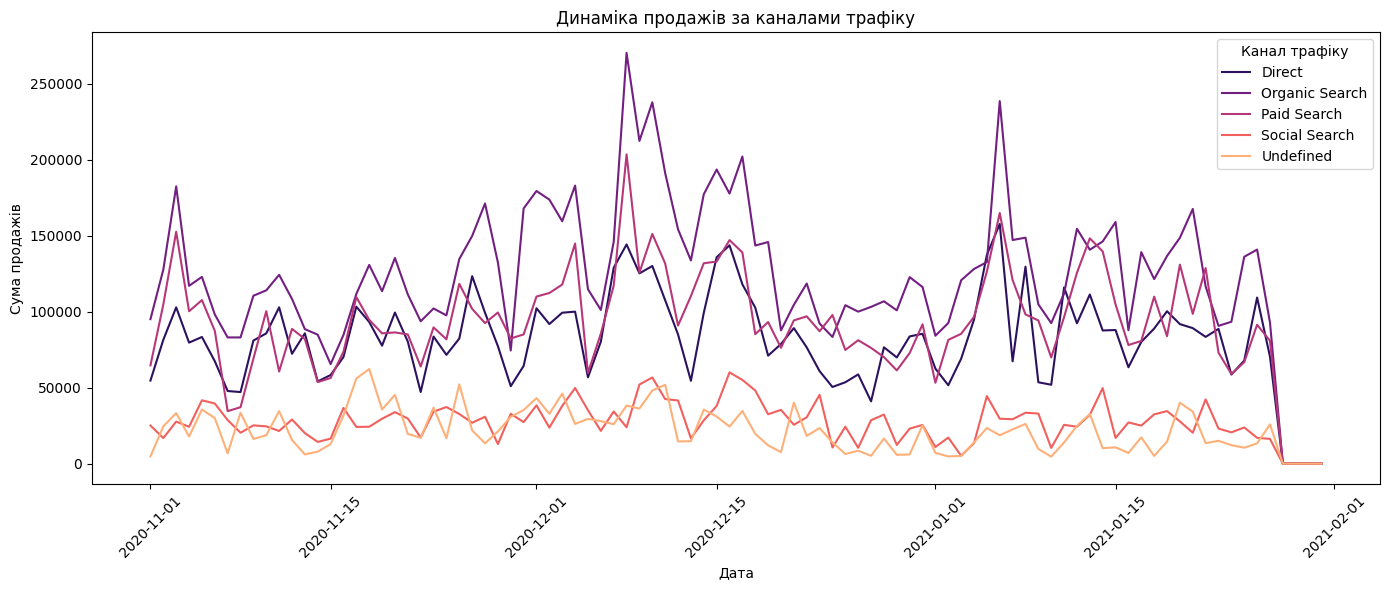

In [ ]:
# Динаміка продажів за каналами трафіку
sales_by_channel = (
    df.groupby(["date", "channel"])["price"]
    .sum()
    .reset_index()
)
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=sales_by_channel,
    x="date",
    y="price",
    hue="channel",
    palette="magma"
)

plt.title("Динаміка продажів за каналами трафіку")
plt.xlabel("Дата")
plt.ylabel("Сума продажів")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Канал трафіку")
plt.show()


Канали трафіку Organic Search та Paid Search мають найкращі результати по продажам, а такі канали як Social Search та Undefined - найнижчі.

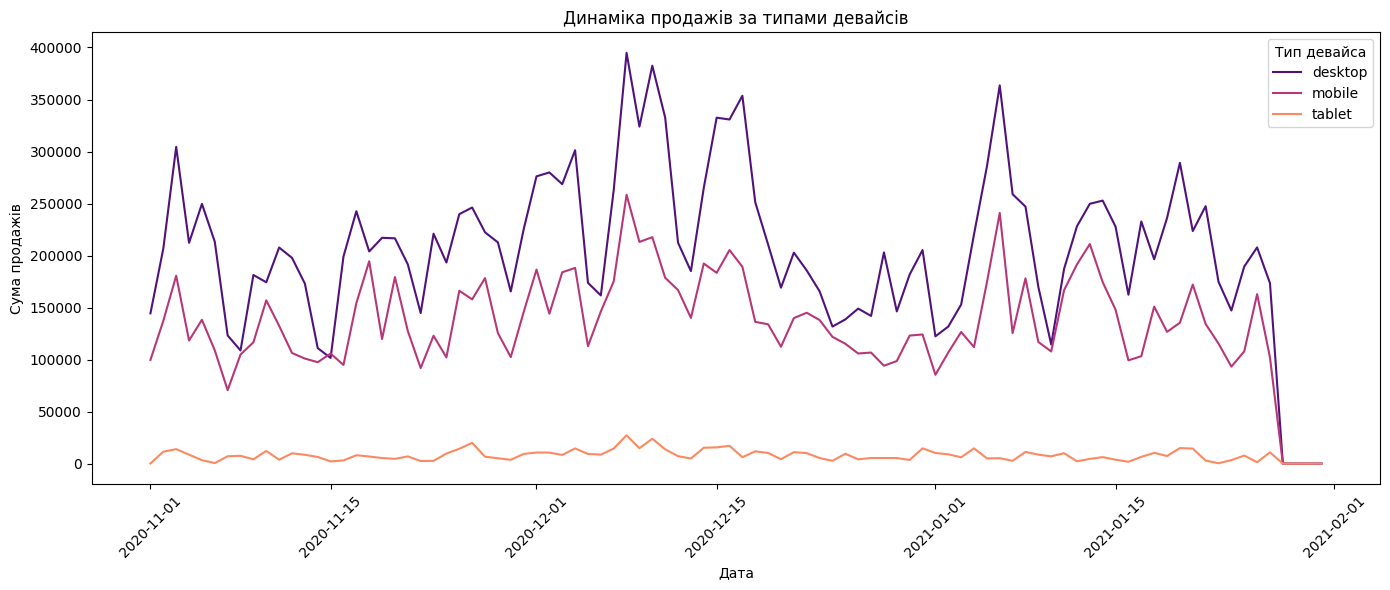

In [ ]:
# Динаміка продажів за типами дейвайсів
sales_by_device = (
    df.groupby(["date", "device"])["price"]
    .sum()
    .reset_index()
)
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=sales_by_device,
    x="date",
    y="price",
    hue="device",
    palette="magma"
)

plt.title("Динаміка продажів за типами девайсів")
plt.xlabel("Дата")
plt.ylabel("Сума продажів")
plt.xticks(rotation=45)
plt.legend(title="Тип девайса")
plt.tight_layout()
plt.show()


За типами девайсів лідерами за продажами є desktop та mobile, а tablet демонструє мінімальні продажі

In [ ]:
# Зведена таблиця у розрізі каналів і типів девайсів
df_sessions = df.dropna(subset=["channel", "device", "ga_session_id"])
pivot_sessions = (
    df_sessions
    .groupby(["channel", "device"])["ga_session_id"]
    .nunique()
    .unstack(fill_value=0)
)
print("Кількість сесій у розрізі каналів і типів девайсів:")
print(pivot_sessions)


Кількість сесій у розрізі каналів і типів девайсів:
device          desktop  mobile  tablet
channel                                
Direct            47825   31745    1812
Organic Search    72622   49014    2789
Paid Search       55167   37034    2140
Social Search     16288   10988     638
Undefined         12527    8486     470


In [ ]:
# Зведена таблиця продажів топ-10 категорій у топ-5 країнах
top_countries = (
    df.groupby("country")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
top_categories = (
    df.groupby("category")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
filtered_df = df[df["country"].isin(top_countries) & df["category"].isin(top_categories)]
pivot_sales = (
    filtered_df
    .groupby(["category", "country"])["price"]
    .sum()
    .unstack(fill_value=0)
)
print("Загальні продажі топ-10 категорій у топ-5 країнах:")
print(pivot_sales)


Загальні продажі топ-10 категорій у топ-5 країнах:
country                             Canada    France     India  \
category                                                         
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
category                                                         
Bar furniture           

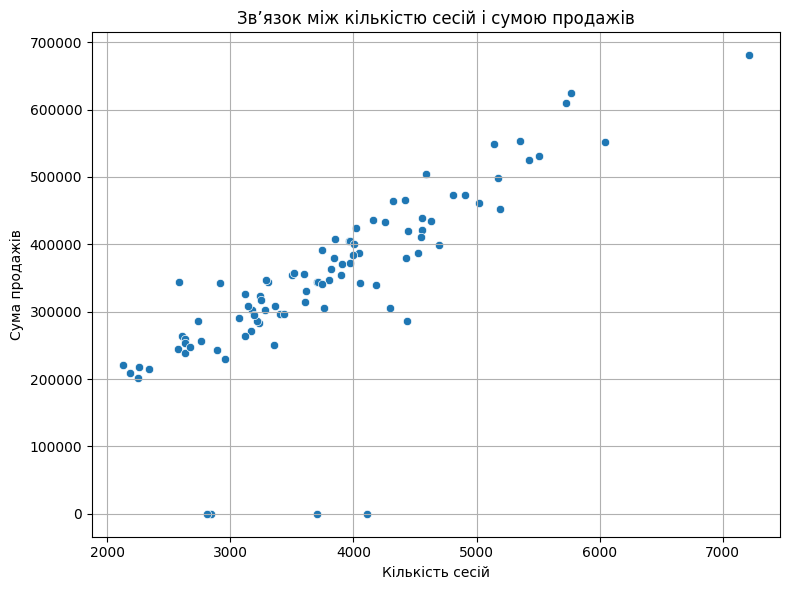

Коефіцієнт кореляції Пірсона: 0.7910809164540893
P-value: 0.00000


In [ ]:
# Зв’язок між кількістю сесій і сумою продажів
daily_stats = (
    df.groupby("date")
    .agg(
        total_sales=("price", "sum"),
        session_count=("ga_session_id", "nunique")
    )
    .reset_index()
)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=daily_stats,
    x="session_count",
    y="total_sales"
)
plt.title("Зв’язок між кількістю сесій і сумою продажів")
plt.xlabel("Кількість сесій")
plt.ylabel("Сума продажів")
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(daily_stats["session_count"], daily_stats["total_sales"])

print(f"Коефіцієнт кореляції Пірсона: {corr_coef:}")
print(f"P-value: {p_value:.5f}")


Можемо відстежити сильну пряму кореляцію між кількістю сесій та сумою продажів

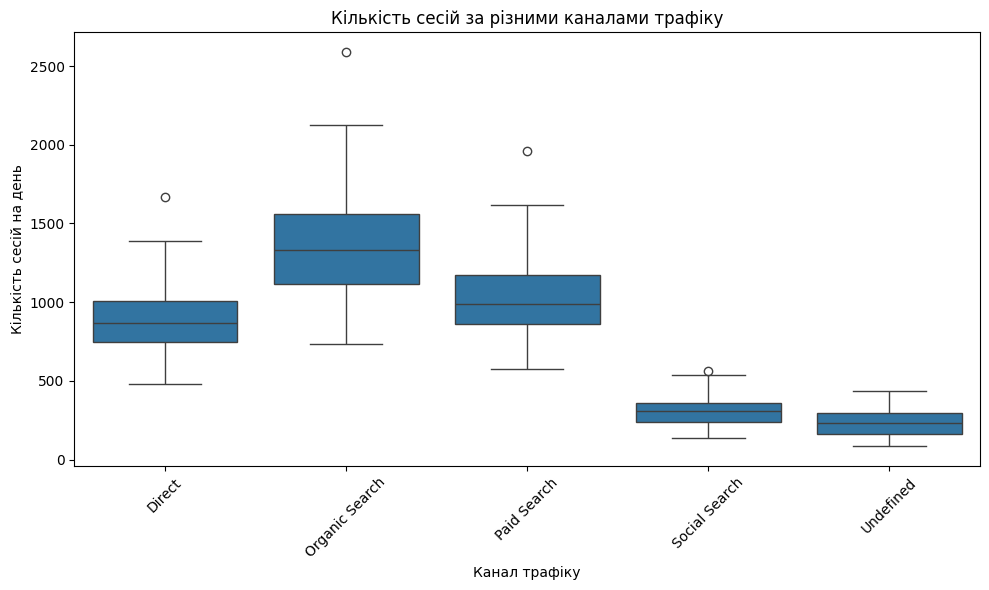

Статистика Крускала-Уолліса: 368.981
P-value: 0.00000


In [ ]:
# Аналіз кількості сесій за різними каналами трафіку
sessions_per_day = (
    df.dropna(subset=["channel", "ga_session_id"])
    .groupby(["date", "channel"])["ga_session_id"]
    .nunique()
    .reset_index()
    .rename(columns={"ga_session_id": "session_count"})
)
plt.figure(figsize=(10, 6))
sns.boxplot(data=sessions_per_day, x="channel", y="session_count")
plt.title("Кількість сесій за різними каналами трафіку")
plt.ylabel("Кількість сесій на день")
plt.xlabel("Канал трафіку")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ми обираємо тест Крускала-Уолліса так як ми порівнюємо кілька незалежних груп (канали трафіку) та дані не гарантують нормальність розподілу, тому краще використовувати непараметричний тест
from scipy.stats import kruskal

# Групуємо дані по каналах
groups = [
    group["session_count"].values
    for _, group in sessions_per_day.groupby("channel")
]

# Проводимо тест
stat, p = kruskal(*groups)

print(f"Статистика Крускала-Уолліса: {stat:.3f}")
print(f"P-value: {p:.5f}")


Статистична відмінність значуща, на що вказує p-value(менше 0.05).
В залежності від каналу трафіку, можемо спостерігати різницю в розподілі щоденної кількості сесій. Канал Organic Search приносить найкращі результати, а найгірші можемо спостерігати у каналів Social Search та Undefined.

[Посилання на дашборд в Табло](https://public.tableau.com/app/profile/inna.lytovchenko/viz/Portfoliodashboard1/Dashboard1)